In [28]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



In [29]:
dataset=pd.read_csv("weatherHistory.csv")
dataset


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [43]:

from sklearn.preprocessing import LabelEncoder


data_cleaned = dataset.drop(columns=["Formatted Date", "Loud Cover", "Summary", "Daily Summary"])

# Handle missing values in 'Precip Type'
data_cleaned['Precip Type'].fillna('unknown', inplace=True)

# Encode the 'Precip Type' categorical variable
encoder = LabelEncoder()
data_cleaned['Precip Type'] = encoder.fit_transform(data_cleaned['Precip Type'])

data_cleaned=data_cleaned.dropna()

#

<ipython-input-43-d8a9af784b83>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['Precip Type'].fillna('unknown', inplace=True)


In [44]:
# Define the target variable (y)
y = data_cleaned['Temperature (C)']

# Define the feature variables (X)
X = data_cleaned[['Humidity',
                  'Wind Speed (km/h)', 'Visibility (km)',
                  'Pressure (millibars)']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((77162, 4), (19291, 4), (77162,), (19291,))

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt





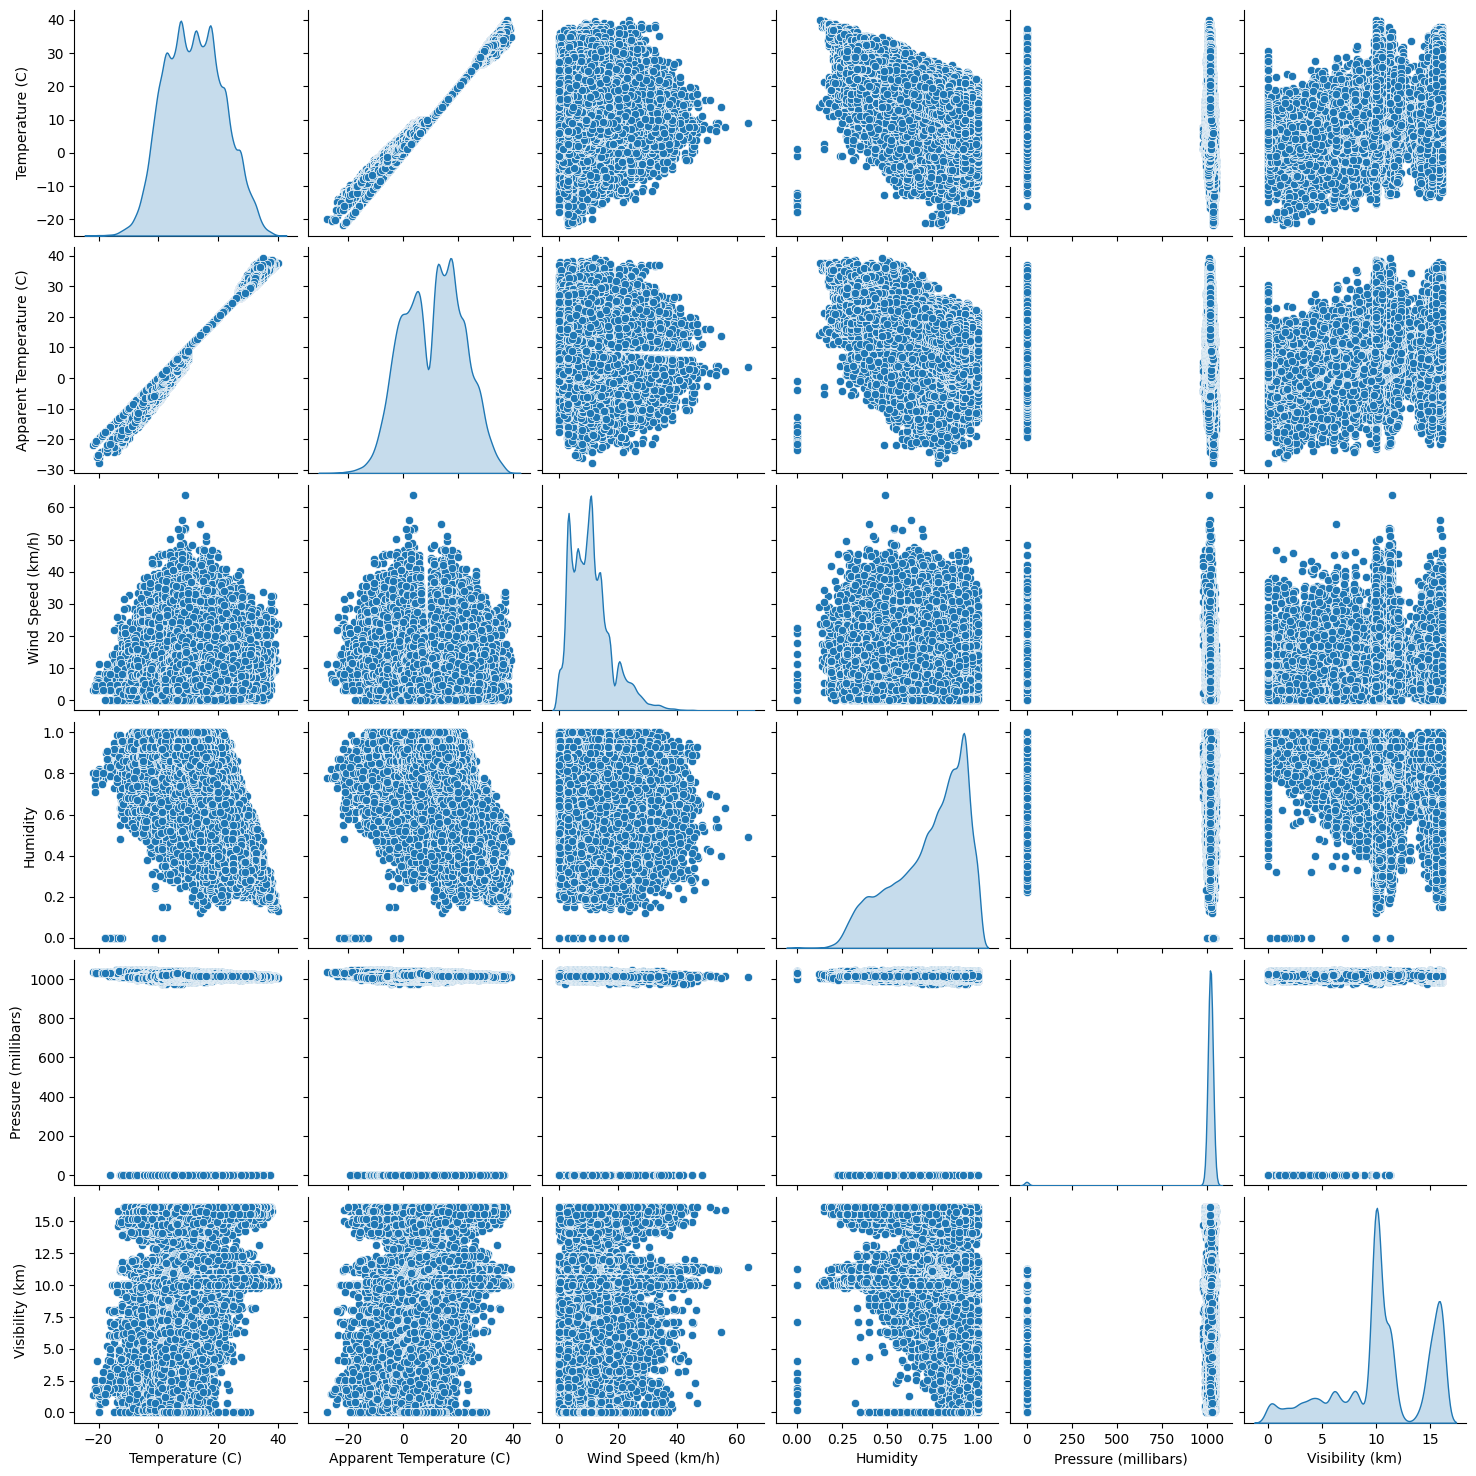

In [46]:


sns.pairplot(data_cleaned[['Temperature (C)', 'Apparent Temperature (C)', 'Wind Speed (km/h)','Humidity',"Pressure (millibars)","Visibility (km)"]], diag_kind='kde')
plt.show()

In [47]:

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [48]:
y_pred = lr.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

Mean Squared Error: 51.074886869897476
R-squared: 0.44579765006076366


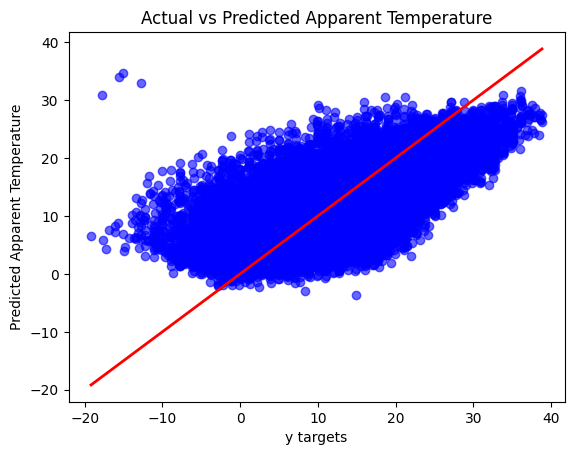

In [49]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Apparent Temperature')
plt.xlabel('y targets')
plt.ylabel('Predicted Apparent Temperature')
plt.show()


In [50]:
modelaccuaecy= lr.score(X_test,y_test)
print(modelaccuaecy)

0.44579765006076366


In [51]:
# Define the target variable (y)
y = data_cleaned['Temperature (C)']

# Define the feature variables (X)
X = data_cleaned[[ 'Humidity',
                  'Wind Speed (km/h)', 'Visibility (km)',
                  'Pressure (millibars)']]


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
print(f"Feature Importances: {feature_importances}")


Feature Importances: [0.44421774 0.14479536 0.16986062 0.24112627]


In [54]:
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 32.95463483964236
R-squared (R²): 0.6424165144791856


In [55]:
modelaccuaecy= rf_model.score(X_test,y_test)
print(modelaccuaecy)

0.6424165144791856


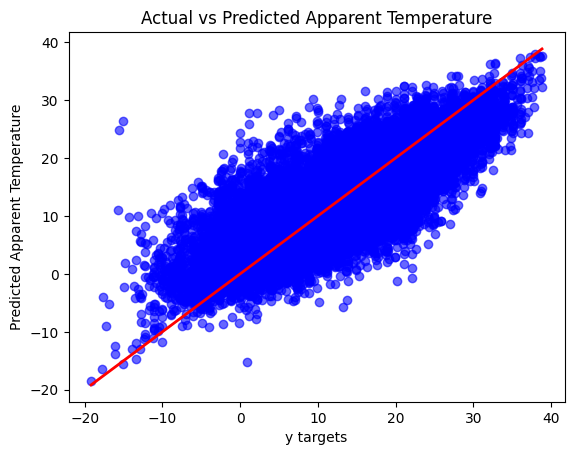

In [56]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Apparent Temperature')
plt.xlabel('y targets')
plt.ylabel('Predicted Apparent Temperature')
plt.show()


In [57]:
y = data_cleaned['Temperature (C)']

# Define the feature variables (X)
X = data_cleaned[[ 'Humidity',
                  'Wind Speed (km/h)', 'Visibility (km)',
                  'Pressure (millibars)']]

In [58]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define a simple neural network for regression
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer (single value prediction)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Predict apparent temperature on new data
predictions = model.predict(X_test)



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2412/2412 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 69.2544
Epoch 2/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 40.8130
Epoch 3/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 36.3676
Epoch 4/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 34.9677
Epoch 5/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 34.5316
Epoch 6/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 34.6117
Epoch 7/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 34.2467
Epoch 8/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 34.5792
Epoch 9/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 34.8895
Epoch 10/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 34.7941
Epoch 11/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 34.3772
Epoch 12/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 34.1133
Epoch 13/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 34.4365
Epoch 14/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 34.5001
Epoch 15/50
2412/2412 ━━━━

In [59]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


y = data_cleaned['Temperature (C)']

# Define the feature variables (X)
X = data_cleaned[[ 'Humidity',
                  'Wind Speed (km/h)', 'Visibility (km)',
                  'Pressure (millibars)']]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Step 4: Train the model on the training data
dt_model.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 7: Display the results
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")


Mean Squared Error: 61.640058200155394
R-squared: 0.3311573025715058


In [60]:
modelaccuaecy= dt_model.score(X_test,y_test)
print(modelaccuaecy)

0.3311573025715058


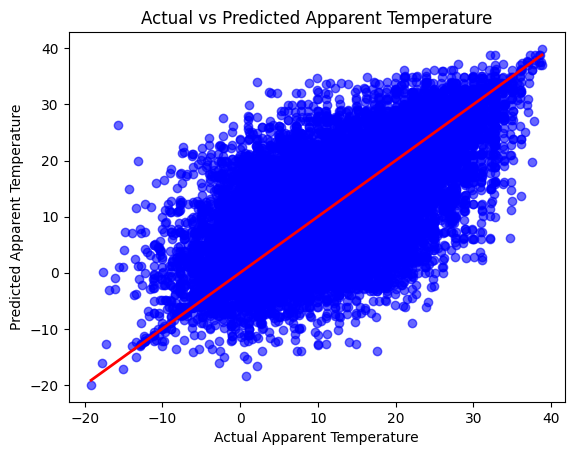

In [61]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Apparent Temperature')
plt.xlabel('Actual Apparent Temperature')
plt.ylabel('Predicted Apparent Temperature')
plt.show()

In [62]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Select features and target
X = data_cleaned[['Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']]  # Features
y = data_cleaned['Temperature (C)']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

y_pred = gbr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")



Gradient Boosting Regression Results:
Mean Squared Error (MSE): 36.30
Mean Absolute Error (MAE): 4.81
R² Score: 0.61


In [65]:
modelaccuaecy= gbr_model.score(X_test,y_test)
print(modelaccuaecy)

0.6060775939967991


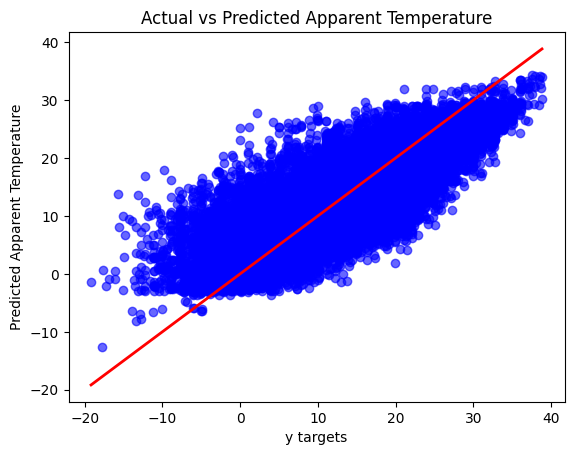

In [66]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Apparent Temperature')
plt.xlabel('y targets')
plt.ylabel('Predicted Apparent Temperature')
plt.show()